In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_excel(r"Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.size

117513

In [5]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [11]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [12]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [13]:
data['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → JLR → HYD                   1
BLR → HBX → BOM → AMD → DEL       1
BOM → JAI → DEL → HYD             1
BOM → DED → DEL → HYD             1
BOM → VNS → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

In [14]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [15]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [16]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
28h 30m      1
33h 45m      1
3h 25m       1
31h 30m      1
30h 10m      1
Name: Duration, Length: 368, dtype: int64

In [17]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [18]:
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [19]:
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

In [20]:
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [21]:
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

In [22]:
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

In [23]:
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [24]:
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [25]:
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [26]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [27]:
corr = data.corr()
corr['Price'].sort_values(ascending = False)

Price            1.000000
Arrival_hour     0.024244
Dep_hour         0.006799
Dep_min         -0.024458
Arrival_min     -0.086155
Journey_month   -0.103643
Journey_day     -0.153774
Name: Price, dtype: float64

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Journey_month'}>],
       [<AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>],
       [<AxesSubplot:title={'center':'Arrival_min'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

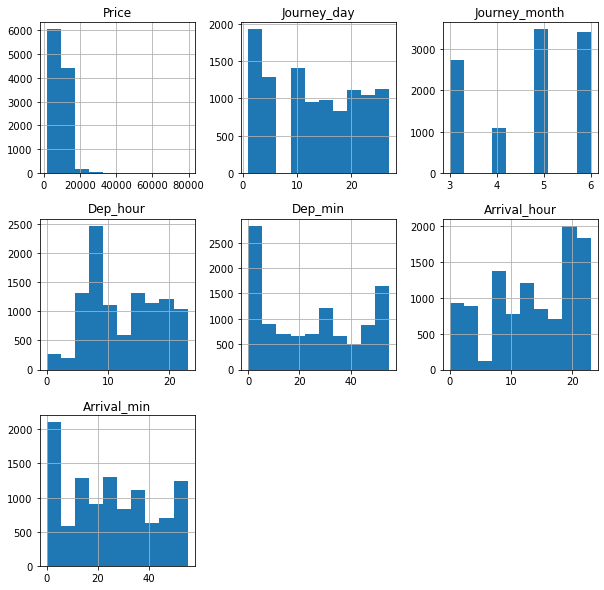

In [28]:
data.hist(figsize=(10,10))

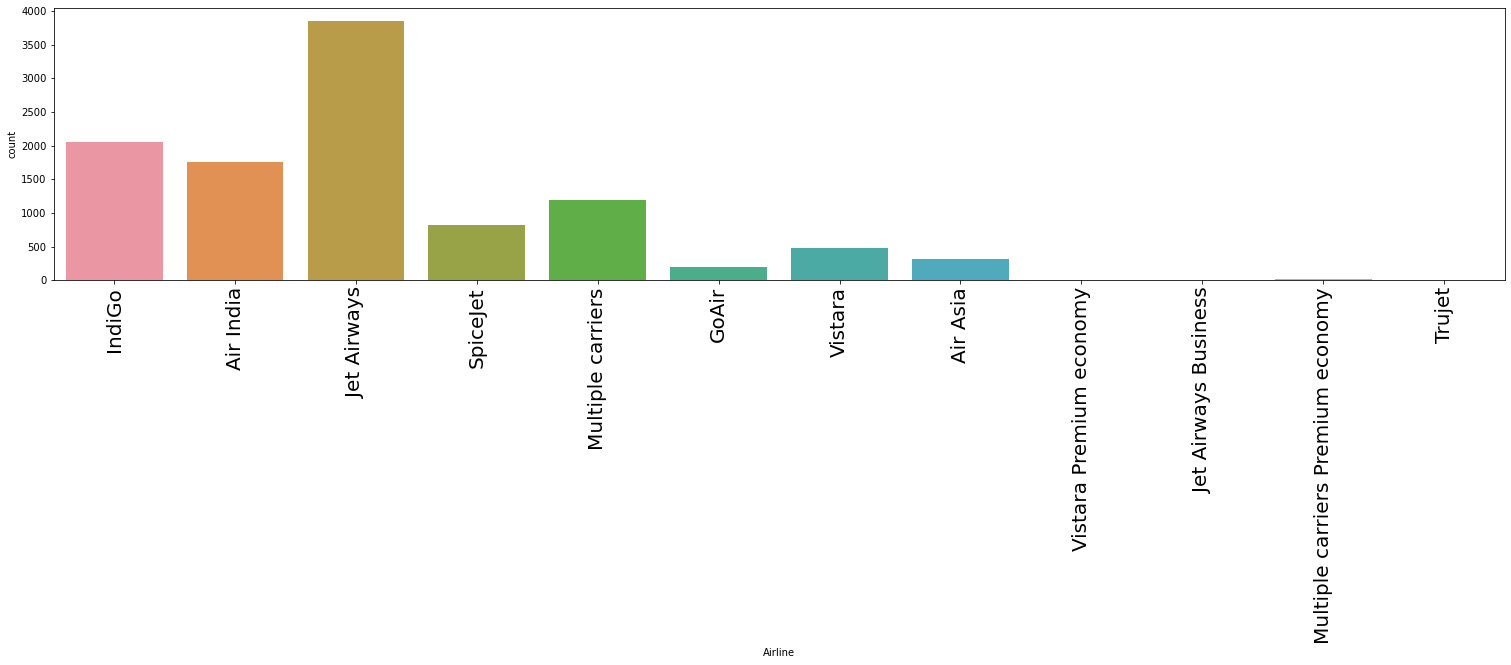

In [29]:
fig, ax = plt.subplots(figsize=(26,5))
sns.countplot(data['Airline'])
plt.xticks(rotation =90,fontsize =20)
plt.show()

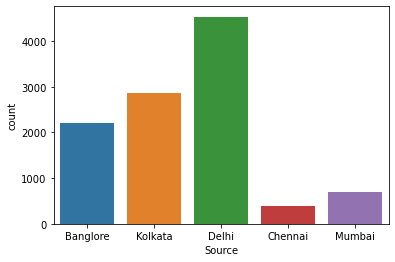

In [30]:
sns.countplot(data['Source'])
plt.show()

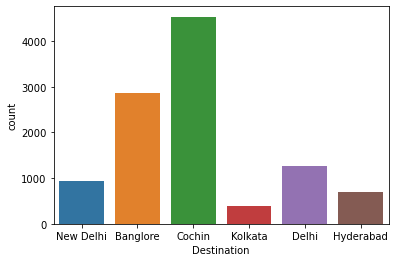

In [31]:
sns.countplot(data['Destination'])
plt.show()

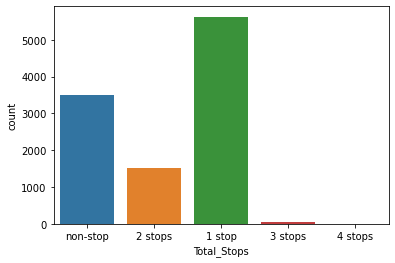

In [32]:
sns.countplot(data['Total_Stops'])
plt.show()

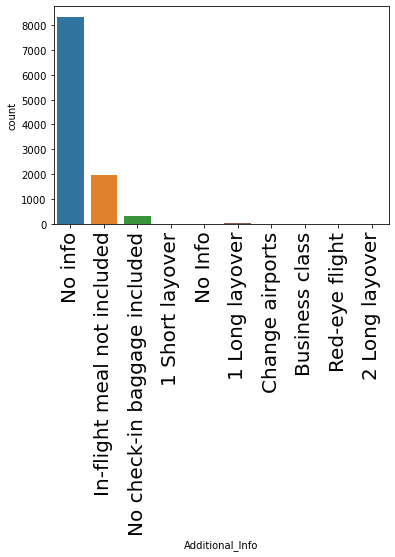

In [33]:
sns.countplot(data['Additional_Info'])
plt.xticks(rotation =90,fontsize =20)
plt.show()

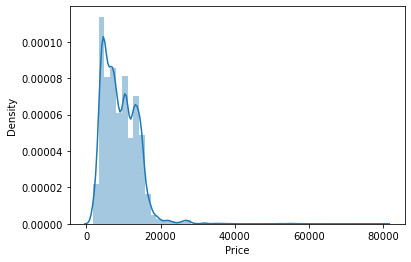

In [34]:
sns.distplot(data['Price'])
plt.show()

<AxesSubplot:xlabel='Journey_month', ylabel='Journey_day'>

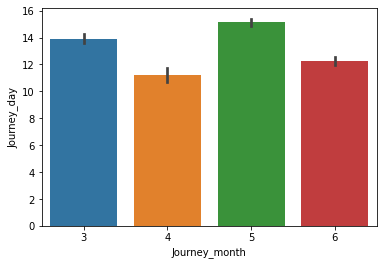

In [35]:
sns.barplot(data['Journey_month'],data['Journey_day'])


<AxesSubplot:xlabel='Arrival_hour', ylabel='Arrival_min'>

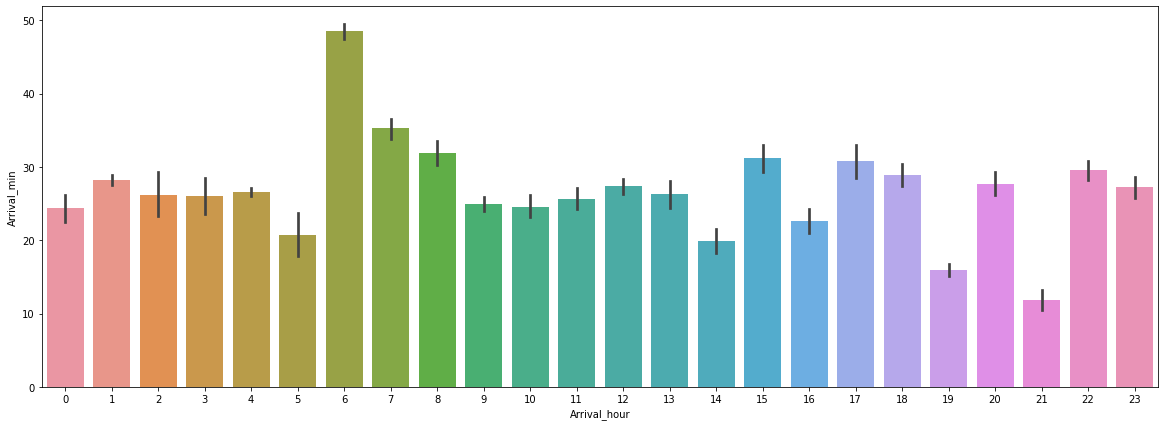

In [36]:
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(data['Arrival_hour'],data['Arrival_min'])

<AxesSubplot:xlabel='Dep_min', ylabel='Dep_min'>

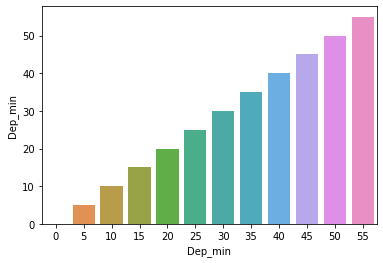

In [37]:
sns.barplot(data['Dep_min'],data['Dep_min'])

<AxesSubplot:xlabel='Airline', ylabel='Price'>

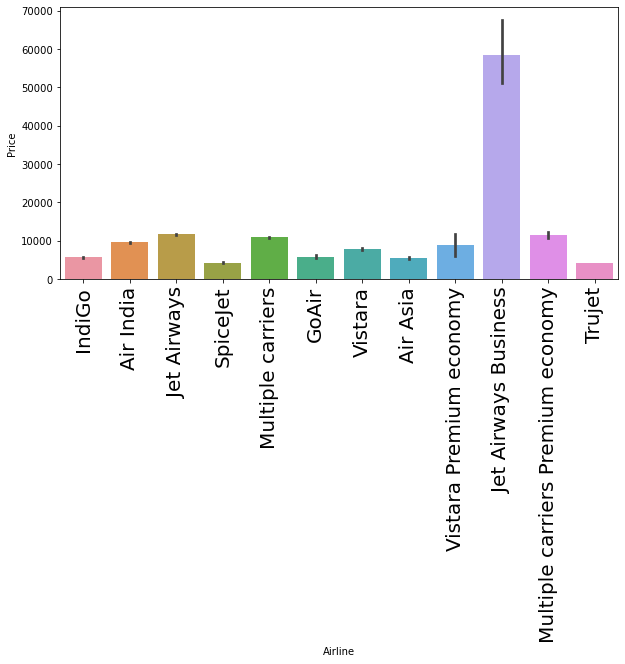

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation =90,fontsize =20)
sns.barplot(data['Airline'],data['Price'])

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

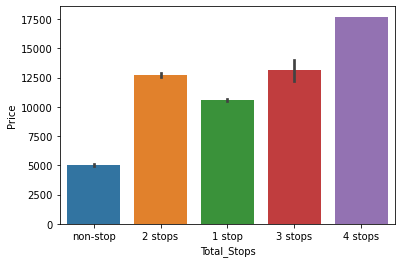

In [39]:
sns.barplot(data['Total_Stops'],data['Price'])

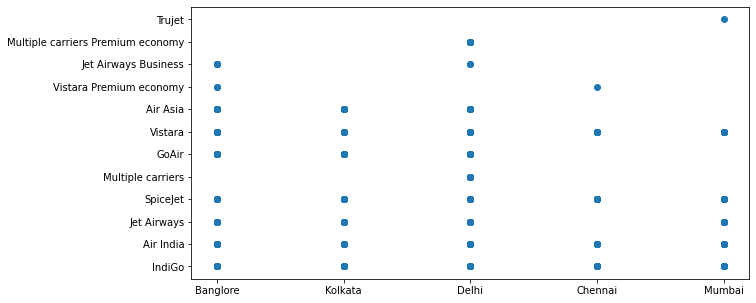

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(data['Source'],data['Airline'])

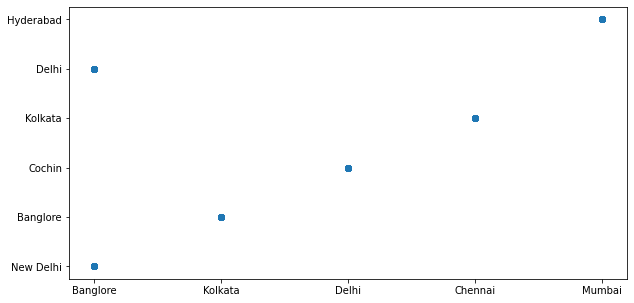

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
plt.scatter(data['Source'],data['Destination'])

<AxesSubplot:>

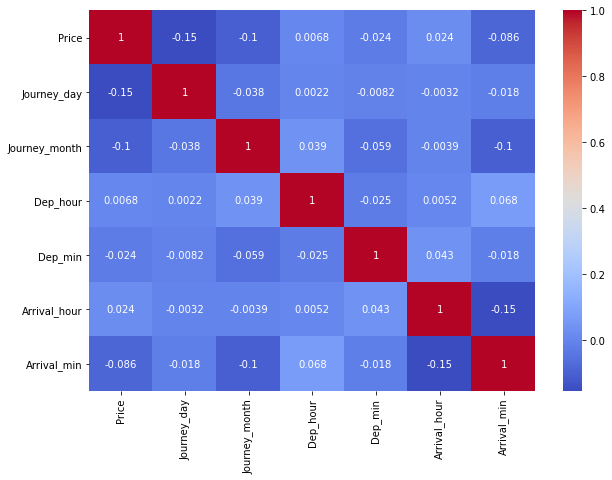

In [42]:
# heat map
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [43]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])

In [44]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,240,4,8,3897,24,3,22,20,1,10
1,1,3,0,84,336,1,8,7662,1,5,5,50,13,15
2,4,2,1,118,106,1,8,13882,9,6,9,25,4,25
3,3,3,0,91,311,0,8,6218,12,5,18,5,23,30
4,3,0,5,29,303,0,8,13302,1,3,16,50,21,35


In [45]:
# treain_test_split
x = data.drop(columns=['Price'])
y = data['Price']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=13)

In [47]:
x_train.shape

(7477, 13)

In [48]:
x_test.shape

(3205, 13)

In [49]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.3847408152816223

In [50]:
y_test

2857     9678
3543    10067
8198     4050
1464     5192
5444     7229
        ...  
9057    13502
5959    12351
2978    16736
7349    13547
1504     4077
Name: Price, Length: 3205, dtype: int64

In [51]:
y_predict

array([10493.22264795,  7843.41262753,  4371.03206784, ...,
       14649.92083482,  8654.29620584,  5591.83233346])

In [52]:
pd.crosstab(y_test,y_predict)

col_0,2814.276733,2906.846612,2936.039246,2947.914815,3055.539673,3092.524694,3138.720187,3140.670603,3167.061263,3171.940717,...,14704.026498,14743.907797,14757.587051,14782.004814,14787.819337,14811.062445,14824.242797,14877.508066,14907.775432,14920.267609
Price,,,,,,,,,,,,,,,,,,,,,
1759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


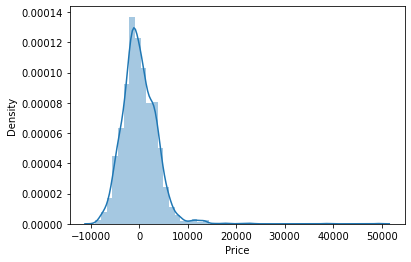

In [53]:
sns.distplot(y_test-y_predict)
plt.show()

In [54]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.7855376368690532

In [55]:
y_predict

array([25139., 21520.,  3210., ..., 16736., 12199.,  3943.])

In [56]:
pd.crosstab(y_test,y_predict)

col_0,1965.0,2017.0,2050.0,2071.0,2175.0,2227.0,2228.0,2385.0,2437.0,2575.0,...,25430.0,25735.0,26890.0,27430.0,27992.0,28097.0,31783.0,31825.0,36235.0,54826.0
Price,,,,,,,,,,,,,,,,,,,,,
1759,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1965,15,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2017,0,7,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2050,0,0,1,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2175,0,0,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35185,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


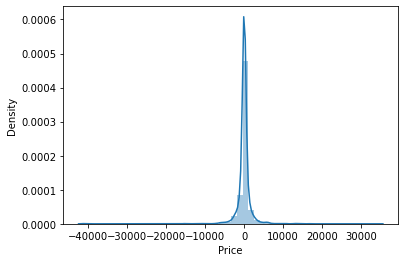

In [57]:
sns.distplot(y_test-y_predict)
plt.show()

In [58]:
model = ExtraTreesRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.9221952247065962

In [59]:
y_predict

array([16490.54, 15927.41,  4008.  , ..., 16489.35, 11364.52,  3734.64])

In [60]:
pd.crosstab(y_test,y_predict)

col_0,1965.00,1965.52,1968.64,1969.20,1976.00,1979.12,2009.06,2015.96,2016.48,2017.00,...,27513.83,27747.44,27846.36,27921.16,28324.90,28639.38,30729.39,31825.00,46291.97,73477.33
Price,,,,,,,,,,,,,,,,,,,,,
1759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1965,8,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017,0,0,0,0,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


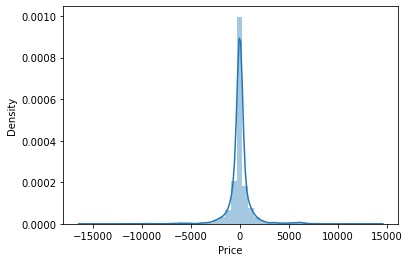

In [61]:
sns.distplot(y_test-y_predict)
plt.show()

In [62]:
# RandomForestClassifier 
model = RandomForestRegressor(random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.9042780925750563

In [63]:
y_predict

array([15740.38, 15107.73,  3928.36, ..., 16409.98, 11752.2 ,  3723.56])

In [64]:
pd.crosstab(y_test,y_predict)

col_0,1965.52,1969.18,1970.24,1971.80,1979.68,1990.18,1992.80,1994.71,2015.48,2024.88,...,28073.94,28271.54,28726.48,29450.52,29598.13,30988.84,37124.62,37281.72,41122.47,64171.34
Price,,,,,,,,,,,,,,,,,,,,,
1759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1965,2,2,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2017,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


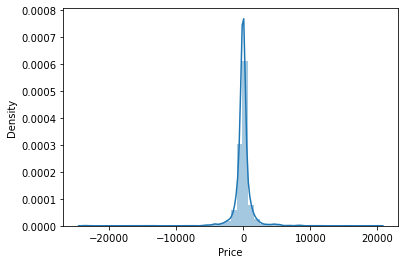

In [65]:
sns.distplot(y_test-y_predict)
plt.show()

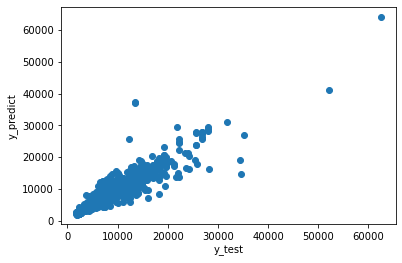

In [66]:
plt.scatter(y_test, y_predict)
plt.xlabel("y_test")
plt.ylabel("y_predict")
plt.show()

In [67]:

print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 625.2355820629969
MSE: 2008403.4806915717
RMSE: 1417.181527078155


In [68]:
# RMSE/(max(DV)-min(DV))

1417.8155/(max(y)-min(y))

0.018234865535734956

In [69]:
metrics.r2_score(y_test, y_predict)

0.9042780925750563

In [70]:
# Dataframe for models
models = {"Linear Regression": LinearRegression(),
          "Decision TreeRegressor": DecisionTreeRegressor(),
          "Extra TreesRegressor": ExtraTreesRegressor(),
          "Random Forest Regressor": RandomForestRegressor()}
    
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [71]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 0.3847408152816223,
 'Decision TreeRegressor': 0.8031779960679148,
 'Extra TreesRegressor': 0.9184624659787327,
 'Random Forest Regressor': 0.9010423450113005}

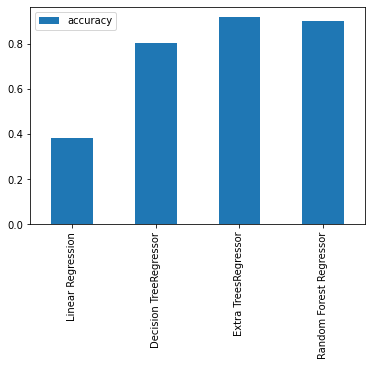

In [72]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();